In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn import preprocessing, tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
seed = 855835128

In [50]:
#file = pd.read_csv('AgeDataset-V1.csv' )
file = pd.read_csv('bow_clean_final.csv')

In [51]:
# file = pd.read_csv(r'E:\Auckland\2022 Semester 2\COMPSCI 760\Assignment\Presentation 2\ModelDf.csv',sep=',',usecols=[3,4,5,8])
#file = pd.read_csv('CleanDf.csv' )

In [52]:
file.nunique()

Id                   23394
Name                 23283
Short description    15240
Gender                   6
Country                746
Occupation             894
Birth year             124
Death year              48
Manner of death         68
Age of death            91
Words                23323
dtype: int64

In [53]:
file.reset_index(drop=True, inplace=True)
file

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Words
0,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952.0,2001.0,natural causes,49.0,douglas noel adam march may wa english author ...
1,Q368,Augusto Pinochet,"General, politician of Chile (1915-2006)",Male,Chile,Politician,1915.0,2006.0,natural causes,91.0,augusto jos ramn pinochet ugarte pinoe also u ...
2,Q407,Linda Lovelace,"American pornographic actress, later anti-porn...",Female,United States of America,Artist,1949.0,2002.0,accident,53.0,linda lovelace born linda susan boreman januar...
3,Q409,Bob Marley,"Jamaican singer, songwriter and musician",Male,Jamaica,Artist,1945.0,1981.0,natural causes,36.0,robert nesta marley om february may baptised b...
4,Q410,Carl Sagan,"American astrophysicist, cosmologist, author a...",Male,United States of America,Researcher,1934.0,1996.0,natural causes,62.0,carl edward sagan sen saygn november december ...
...,...,...,...,...,...,...,...,...,...,...,...
23390,Q70706427,Hevrin Khalaf,Syrian Kurdish politician and civil engineer,Female,Syria,Politician,1984.0,2019.0,homicide,35.0,hevrin khalaf kurdish hevrn xelef arabic also ...
23391,Q70794825,Richard Tracey,Australian judge,Male,Australia,Judge,1948.0,2019.0,natural causes,71.0,richard ross sinclair tracey rfd qc august oct...
23392,Q71262658,Patrick Day,American boxer,Male,United States of America,Athlete,1992.0,2019.0,accident,27.0,patrick day august october wa american profess...
23393,Q74642113,Baha Abu al-Ata,Palestinian terrorist organization leader,Male,State of Palestine,Condottiero; resistance fighter,1977.0,2019.0,death in battle,42.0,baha abu alata arabic november november wa lea...


## Gender

In [54]:
file['Gender'].value_counts()

Male                          19069
Female                         4304
Transgender Female               13
Transgender Male                  7
Intersex                          1
Transgender Female; Female        1
Name: Gender, dtype: int64

In [55]:
gender_combine = {'Transgender Female' : 'Diverse', 
                  'Transgender Male': 'Diverse', 
                  'Eunuch; Male' : 'Diverse', 
                  'Transgender Female; Female':'Diverse',
                  'Eunuch':'Diverse', 
                  'Intersex': 'Diverse', 
                 }
file['Gender'] = file['Gender'].replace(gender_combine)
file['Gender'].value_counts()

Male       19069
Female      4304
Diverse       22
Name: Gender, dtype: int64

## Manner of death

In [56]:
file['Manner of death'].value_counts()

natural causes                           18596
accident                                  1785
suicide                                   1479
homicide                                  1280
capital punishment                         123
                                         ...  
chronic obstructive pulmonary disease        1
deliberate murder                            1
Canserbero                                   1
suicide attack                               1
homicide; accident; natural causes           1
Name: Manner of death, Length: 68, dtype: int64

(-0.5, 799.5, 499.5, -0.5)

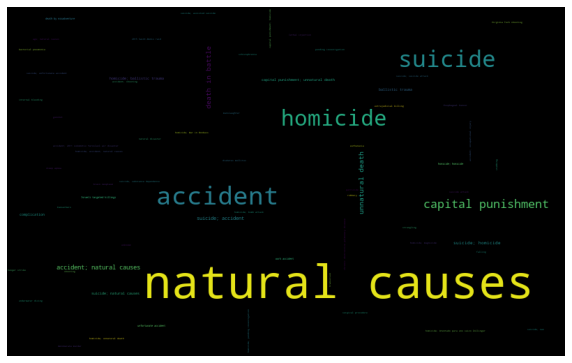

In [57]:
from wordcloud import WordCloud 

MoD = file['Manner of death'].value_counts().to_dict()
freq_death = WordCloud(width =800, height =500, min_font_size=2).generate_from_frequencies(MoD)
plt.figure(figsize=(10,10))
plt.imshow(freq_death)
plt.axis('off')

Making natural causes, accident, suicide, homicide and capital punishment our target label.

In [58]:
file['Manner of death']=file['Manner of death'].astype(str)
file['Manner of death']=file['Manner of death'].apply(lambda x:x.split(';')[0]) # only getting the first word before the ;
file['Manner of death'].value_counts()

natural causes                           18596
accident                                  1801
suicide                                   1498
homicide                                  1292
capital punishment                         127
unnatural death                             18
death in battle                             17
complication                                 3
ballistic trauma                             3
unfortunate accident                         2
work accident                                2
death by misadventure                        2
Israeli targeted killings                    2
Esophageal Cancer                            1
sleep apnea                                  1
surgical procedure                           1
unknown                                      1
underwater diving                            1
extrajudicial killing                        1
schizophrenia                                1
euthanasia                                   1
diabetes mell

Feature engineering

In [59]:
MoD_combine = {'unnatural death ' : 'accident', 
                'death in battle': 'homicide', 
                'complication' : 'natural causes ', 
                'ballistic trauma':'homicide',
                'work accident':'accident', 
                'Israeli targeted killings': 'homicide',
                'unfortunate accident': 'accident',
               'death by misadventure': 'accident', 
               'brain neoplasm': 'natural causes', 
               'underwater diving': 'accident', 
               'natural disaster': 'accident', 
               'stabbing': 'homicide', 
               'extrajudicial killing': 'homicide', 
               'chronic obstructive pulmonary disease': 'natural causes', 
               'sleep apnea': 'natural causes', 
               'schizophrenia': 'natural causes', 
               'bacterial pneumonia': 'natural causes', 
               'falling': 'accident', 
               'suicide attack': 'suicide',
               'manslaughter': 'homicide', 
               'lethal injection': 'capital punishment', 
               'Canserbero': 'natural causes', 
               'Esophageal Cancer': 'natural causes', 
               'diabetes mellitus': 'natural causes', 
               '2015 Saint-Denis raid': 'homicide',
               'natural causes ': 'natural causes', 
               'unnatural death': 'accident', 
               'shooting': 'homicide', 
               'deliberate murder': 'homicide',
               'gunshot': 'homicide', 
               'Virginia Tech shooting': 'homicide',
               'strangling': 'homicide', 
               'hunger strike': 'accident', 
               'robbery': 'homicide',
               'euthanasia': 'natural causes',
               'internal bleeding': 'accident', 
                 }
file['Manner of death'] = file['Manner of death'].replace(MoD_combine)
file['Manner of death'].value_counts()

natural causes           18605
accident                  1830
suicide                   1499
homicide                  1324
capital punishment         128
natural causes               3
pending investigation        1
patricide                    1
transition                   1
surgical procedure           1
unknown                      1
age                          1
Name: Manner of death, dtype: int64

In [60]:
#only getting the top 5 deaths
deaths = ['natural causes' ,'suicide', 'homicide', 'accident', 'capital punishment']
file = file[file['Manner of death'].isin(deaths)]

<AxesSubplot:title={'center':'Percentage of manner of deaths'}, ylabel='Count'>

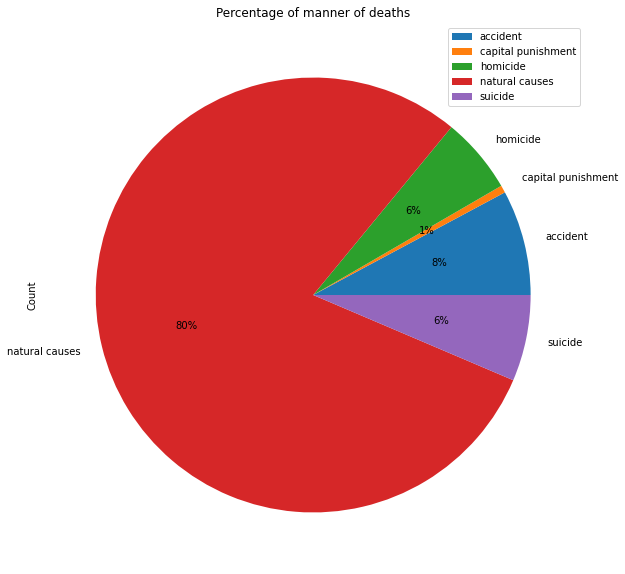

In [61]:
#pie chart for manner of death
#class imbalance
Manner_of_death = file[['Manner of death']].groupby(['Manner of death']).size().reset_index(name='Count').sort_values('Count', ascending = False)
Manner_of_death.groupby(['Manner of death']).sum().plot(kind='pie', y='Count', autopct='%1.0f%%',title='Percentage of manner of deaths', figsize=(15, 10))

<AxesSubplot:xlabel='Age of death', ylabel='Manner of death'>

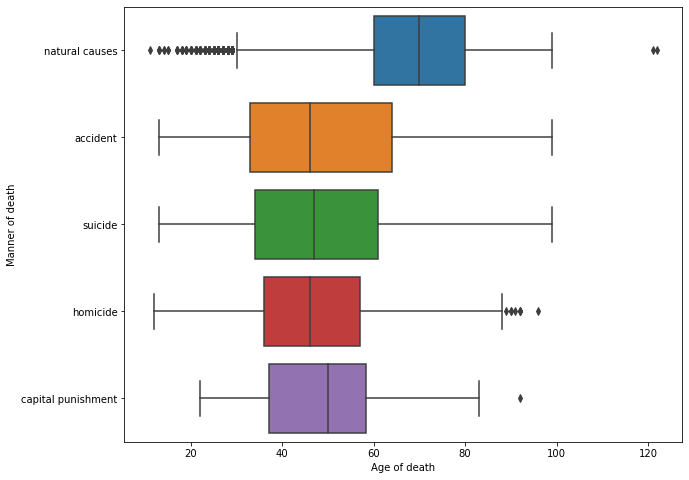

In [62]:
plt.figure(figsize=(10,8))
sns.boxplot(data=file, x='Age of death', y = 'Manner of death')

<AxesSubplot:xlabel='Gender', ylabel='Birth year'>

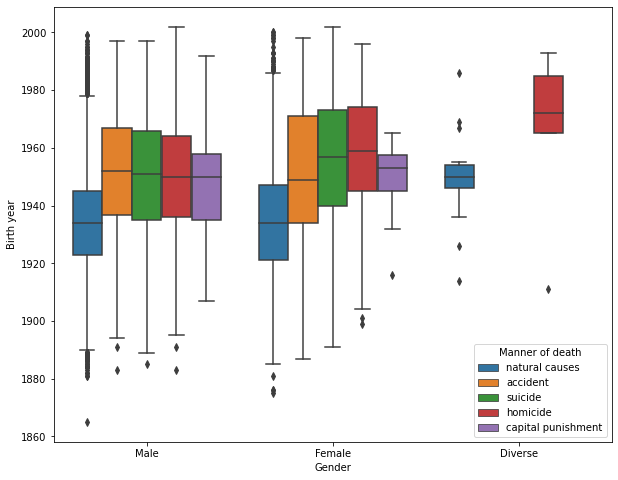

In [63]:
plt.figure(figsize=(10,8))
sns.boxplot(data=file[file['Birth year']>1700], x='Gender', y = 'Birth year',hue='Manner of death')

## Occupation

In [64]:
file = file.assign(Occupation=lambda d: d['Occupation'].astype(str))
file['Occupation']=file['Occupation'].apply(lambda x:x.split(';')[0]) # only getting the first word before the ;
occu = file['Occupation'].value_counts()
top_occupation = occu.head(10)
top_occupation

Artist                10556
Athlete                3871
Politician             2879
Researcher             1071
Journalist              548
Military personnel      436
Businessperson          409
Religious figure        200
Teacher                 175
Engineer                135
Name: Occupation, dtype: int64

## Country

In [65]:
file = file.assign(Country=lambda d: d['Country'].astype(str))
file['Country']=file['Country'].apply(lambda x:x.split(';')[0]) # only getting the first word before the ;
file['Country'].value_counts()

United States of America     10655
United Kingdom                2232
Canada                         909
France                         772
Australia                      588
                             ...  
San NicolÃ¡s de los Garza        1
Indians                          1
English people                   1
Gambia                           1
Andorra                          1
Name: Country, Length: 232, dtype: int64

In [66]:
# pd.crosstab(file['Manner of death'],file['Occupation'],normalize='index').plot.bar(stacked=True)

<AxesSubplot:xlabel='Manner of death'>

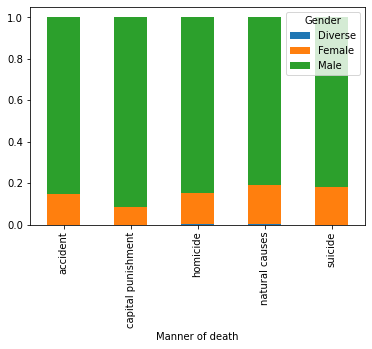

In [67]:
pd.crosstab(file['Manner of death'],file['Gender'],normalize='index').plot.bar(stacked=True)

In [68]:
file.reset_index(drop=True, inplace=True)

## Hyper parameter tuning

In [69]:
file

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death,Words
0,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952.0,2001.0,natural causes,49.0,douglas noel adam march may wa english author ...
1,Q368,Augusto Pinochet,"General, politician of Chile (1915-2006)",Male,Chile,Politician,1915.0,2006.0,natural causes,91.0,augusto jos ramn pinochet ugarte pinoe also u ...
2,Q407,Linda Lovelace,"American pornographic actress, later anti-porn...",Female,United States of America,Artist,1949.0,2002.0,accident,53.0,linda lovelace born linda susan boreman januar...
3,Q409,Bob Marley,"Jamaican singer, songwriter and musician",Male,Jamaica,Artist,1945.0,1981.0,natural causes,36.0,robert nesta marley om february may baptised b...
4,Q410,Carl Sagan,"American astrophysicist, cosmologist, author a...",Male,United States of America,Researcher,1934.0,1996.0,natural causes,62.0,carl edward sagan sen saygn november december ...
...,...,...,...,...,...,...,...,...,...,...,...
23381,Q70706427,Hevrin Khalaf,Syrian Kurdish politician and civil engineer,Female,Syria,Politician,1984.0,2019.0,homicide,35.0,hevrin khalaf kurdish hevrn xelef arabic also ...
23382,Q70794825,Richard Tracey,Australian judge,Male,Australia,Judge,1948.0,2019.0,natural causes,71.0,richard ross sinclair tracey rfd qc august oct...
23383,Q71262658,Patrick Day,American boxer,Male,United States of America,Athlete,1992.0,2019.0,accident,27.0,patrick day august october wa american profess...
23384,Q74642113,Baha Abu al-Ata,Palestinian terrorist organization leader,Male,State of Palestine,Condottiero,1977.0,2019.0,homicide,42.0,baha abu alata arabic november november wa lea...


In [70]:
#combining all words into single column for bag of words
file = file.assign(Birth_year=lambda d: d['Birth year'].astype(str))
file['Country'].replace(' ', '-', regex=True,inplace=True)
# file['Combined_words'] = file['Gender'] + ' ' + file['Country'] + ' ' + file['Occupation'] + ' ' + file['Birth_year'] + ' ' + file['preprocessed_Short description']
file['Combined_words'] = file['Gender'] + ' ' + file['Country'] + ' ' + file['Occupation'] + ' ' + file['Birth_year'] + ' ' + file['Words']

In [71]:
target = file['Manner of death'] #decreased the labels to 5 
#data = file[['Gender','Occupation','Country','Birth year']]

In [72]:
target.nunique()

5

In [73]:
file.isnull().sum()

Id                   0
Name                 0
Short description    0
Gender               0
Country              0
Occupation           0
Birth year           0
Death year           0
Manner of death      0
Age of death         0
Words                0
Birth_year           0
Combined_words       0
dtype: int64

In [74]:
# pre-processing data

# data_T = data.T
# arr1 = data_T.to_numpy()
# temp = np.zeros((4,len(data)))
# le1 = preprocessing.LabelEncoder()
# for i in range(len(arr1)):
#     le1.fit(arr1[i])
#     temp[i] = le1.transform(arr1[i])
# x_T = pd.DataFrame(temp)
# x = x_T.T
# x = x.to_numpy()

arr2 = target.to_numpy()
le2 = preprocessing.LabelEncoder()
le2.fit(arr2)
y = le2.transform(arr2)
# The result of pre-processing
#print("The feature vectors:\n",x)
print("The predictive vector:\n",y)

The predictive vector:
 [3 3 0 ... 0 2 3]


In [75]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1))
x = vectorizer.fit_transform(file['Combined_words'])
#x = x_1.toarray()

In [76]:
x.shape

(23386, 427447)

In [77]:
#stratified Kfold for imbalance class
skf = StratifiedKFold(n_splits = 5, random_state = seed, shuffle = True) # 5 number of folds
skf.get_n_splits(x,y)

for train, test in skf.split(x, y): #for hyper parameter tuning
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = seed)

In [78]:
x_test.shape

(4677, 427447)

In [79]:
x_train.shape

(18709, 427447)

In [ ]:
# calculate Gini and Enrtopy
DT = DecisionTreeClassifier(random_state = seed)
score = cross_val_score(DT,x_train,y_train,cv=skf).mean()
print('Gini: %.4f'%score)
DT = DecisionTreeClassifier(criterion = 'entropy',random_state = seed)
score = cross_val_score(DT,x_train,y_train,cv=skf).mean()
print('Entropy: %.4f'%score)

Entropy is better than Gini in this data set.

In [ ]:
ScoreAll = []
for i in range(1,50,5):
    DT = DecisionTreeClassifier(max_depth = i,criterion = 'entropy',random_state = seed)
    score = cross_val_score(DT,x_train,y_train,cv = skf).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:,1]))[0][0]
print("The optimal parameters and the highest score:\n",ScoreAll[max_score])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [ ]:
ScoreAll = []
for i in range(1,10):
    DT = DecisionTreeClassifier(max_depth = i,criterion = 'entropy',random_state = seed)
    score = cross_val_score(DT,x_train,y_train,cv = skf).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:,1]))[0][0]
print("The optimal parameters and the highest score:\n",ScoreAll[max_score])
plt.figure(figsize=[20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [ ]:
# consider min_samples_split
ScoreAll = []
for i in range(2,30):
    DT = DecisionTreeClassifier(max_depth = 3, min_samples_split = i,criterion = 'entropy',random_state = seed)
    score = cross_val_score(DT,x_train,y_train,cv= skf).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:,1]))[0][0]
print("The optimal parameters and the highest score:\n",ScoreAll[max_score])
plt.figure(figsize = [20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

There is no need to modify the min_samples_split parameter.

In [ ]:
# consider min_samples_leaf
ScoreAll = []
for i in range(1,30):
    DT = DecisionTreeClassifier(min_samples_leaf = i, min_samples_split = 2,max_depth = 3,criterion = 'entropy',random_state = seed)
    score = cross_val_score(DT,x_train,y_trainx_train,y_train,cv= skf).mean()
    ScoreAll.append([i,score])
ScoreAll = np.array(ScoreAll)

max_score = np.where(ScoreAll == np.max(ScoreAll[:,1]))[0][0]
print("The optimal parameters and the highest score:\n",ScoreAll[max_score])
plt.figure(figsize = [20,5])
plt.plot(ScoreAll[:,0],ScoreAll[:,1])
plt.show()

In [ ]:
%%time
# Entropy,max_depth = 3, min_samples_leaf = 1, min_samples_split = 2
param_grid = {
    'max_depth':np.arange(1,10),
    'min_samples_leaf':np.arange(1,10),
    'min_samples_split':np.arange(2,10)
}
DTC = DecisionTreeClassifier(criterion = 'entropy',random_state = seed)
GS = GridSearchCV(DTC,param_grid,cv=skf) #stratified cross fold of 5
GS.fit(x_train,y_train)
print(GS.best_params_)
print(GS.best_score_)

In [80]:
%%time

DT = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 7, min_samples_split= 2)

#stratified CV 
score = []
for train, test in skf.split(x, y):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    DTClass = DT.fit(x_train,y_train)
    
    test_score = DTClass.score(x_test, y_test)
    score.append(test_score)

print(f'Mean accuracy {(sum(score)/len(score))*100}%')
# train_score = DTClass.score(x_train, y_train)
# print('Accuracy on train set: {:.3f}%'.format(train_score * 100))

# test_score = DTClass.score(x_test, y_test)
# print('Accuracy on test set: {:.3f}%'.format(test_score * 100))

Mean accuracy 88.68982896206526%
CPU times: user 54.8 s, sys: 63.9 ms, total: 54.9 s
Wall time: 54.9 s


In [81]:
#getting features picked by decision tree
decision_feature_importatnt = pd.DataFrame(
                                    data=DTClass.feature_importances_,
                                    columns=['importance'],
                                    index= vectorizer.get_feature_names(),
                                    ).sort_values(by=['importance'], ascending=False)

In [82]:
dcfeature = decision_feature_importatnt[decision_feature_importatnt['importance'] > 0] #disregarding not used features

In [83]:
dcfeature

,importance
suicide,0.236467
killed,0.128267
cancer,0.100084
accident,0.085533
died,0.082275
...,...
would,0.000118
solid,0.000069
behalf,0.000065
scene,0.000062


(-0.5, 799.5, 499.5, -0.5)

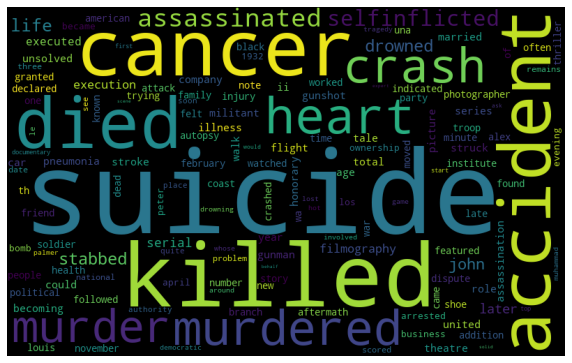

In [84]:
freq_death = WordCloud(width =800, height =500, min_font_size=2).generate_from_frequencies(dcfeature['importance'].to_dict())
plt.figure(figsize=(10,10))
plt.imshow(freq_death)
plt.axis('off')

# RANDOM FOREST FOR COMPARISON

In [39]:
%%time
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(random_state=seed)

score_rf= []
for train, test in skf.split(x, y):
    x_train, x_test = x[train], x[test]
    y_train, y_test = y[train], y[test]
    random_forest.fit(x_train,y_train)
    
    test_score = random_forest.score(x_test, y_test)
    score_rf.append(test_score)
print(f'Mean accuracy {(sum(score_rf)/len(score_rf))*100}%')

Mean accuracy 81.36492215414174%
CPU times: user 8min 36s, sys: 212 ms, total: 8min 37s
Wall time: 8min 37s


(-0.5, 799.5, 499.5, -0.5)

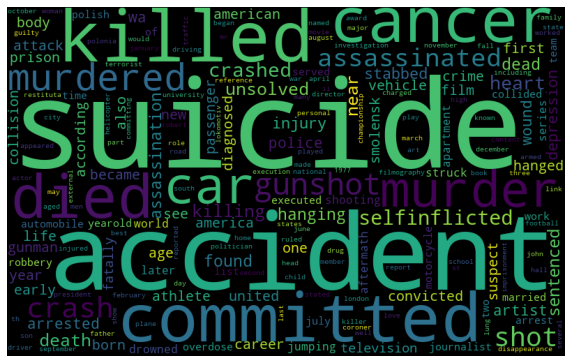

In [40]:
#getting features picked by RF
decision_feature_importatnt = pd.DataFrame(
                                    data=random_forest.feature_importances_,
                                    columns=['importance'],
                                    index= vectorizer.get_feature_names(),
                                    ).sort_values(by=['importance'], ascending=False)
dcfeature = decision_feature_importatnt[decision_feature_importatnt['importance'] > 0] #disregarding not used features

freq_death = WordCloud(width =800, height =500, min_font_size=2).generate_from_frequencies(dcfeature['importance'].to_dict())
plt.figure(figsize=(10,10))
plt.imshow(freq_death)
plt.axis('off')